### GATHER :
================

Working environment : Jupyter Notebook - python version : '0.23.3'

Gathering is the first step in the data wrangling process.
    
    1-Import all needed libraries 
    2-Obtaining data from different resources :

        -Reading from .csv file using pandas (twitter-archive-enhanced.csv) 
        -Downloading  .tsv file from the internet using requests (image-predictions.tsv) 
        -Getting JSON object of all the tweet_ids using TweepyQuerying an API (tweet_json.txt)
    3-Importing that data into data frames 

In [375]:
# Import all required libraries 
import numpy as np
import pandas as pd
import json
import re
import requests
import configparser
import datetime
import matplotlib.pyplot as plt
import os
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore') 
%matplotlib inline 
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer

In [376]:
pd. __version__ 

'0.23.3'

In [377]:
# load twitter-archive-enhanced.CSV into a data frame
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [378]:
# load image_predictions.tsv file programatically using the Requests Library
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# save to .tsv file
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)


In [379]:
image_predictions = pd.read_csv('image_predictions.tsv',sep='\t')

In [380]:
# Create a copy of the data frames 
archive_df = twitter_archive.copy()
Image_predictions_df = image_predictions.copy()

In [381]:
# inspect twitter_archive dataframe
archive_df.shape

(2356, 17)

In [382]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [383]:
archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [384]:
# inspect Image_predictions data frame
Image_predictions_df.shape

(2075, 12)

In [385]:
Image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [386]:
Image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [387]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
#consumer_key = 'HIDDEN'
#consumer_secret = 'HIDDEN'
#access_token = 'HIDDEN'
#access_secret = 'HIDDEN'

#auth = OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit=True)


# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor

# Tweet IDs for which to gather additional data via Twitter's API
#tweet_ids = twitter_archive.tweet_id.values
#len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#    for tweet_id in tweet_ids:
#        count += 1
#        print(str(count) + ": " + str(tweet_id))
#        try:
#            tweet = api.get_status(tweet_id, tweet_mode='extended')
#            print("Success")
#            json.dump(tweet._json, outfile)
#            outfile.write('\n')
#        except tweepy.TweepError as e:
#            print("Fail")
#            fails_dict[tweet_id] = e
#            pass
#end = timer()
#print(end - start)
#print(fails_dict)

In [388]:
# Create new dataframe with id, retweet_count, and favorite_count from the gived JSON file from UDACITY
# change id to tweet_id for consistence in naming Variables

tweet_json = open('tweet-json.txt', 'r')
api_df = pd.DataFrame(columns=['tweet_id', 'retweets', 'favorites'])

for line in tweet_json:
    tweet = json.loads(line)
    api_df = api_df.append({'tweet_id': tweet['id'], 'retweets': tweet['retweet_count'], 'favorites': tweet['favorite_count']}, ignore_index=True)
tweet_json.close()

In [389]:
# make sure that dataframe is created and rows are selected
api_df.shape

(2354, 3)

In [390]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id     2354 non-null object
retweets     2354 non-null object
favorites    2354 non-null object
dtypes: object(3)
memory usage: 55.2+ KB


In [391]:
# inspect image_predictions data frame 
api_df.head()

,tweet_id,retweets,favorites
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


ASSESS:
========

After obtaining these data into data frames, we assess them ( in excel and jupyter notebook) visually and programmatically for detecting and documenting both quality and tidiness issues

archive_df Inspection:
===================

In [392]:
archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [393]:
archive_df.sample(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2344,666071193221509120,NaN,NaN,2015-11-16 01:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666071193...,9,10,None,None,None,None,None
1059,741743634094141440,NaN,NaN,2016-06-11 21:27:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Aqua. She's a sandy pupper. Not sure how ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/741743634...,11,10,Aqua,None,None,pupper,None
1414,698710712454139905,NaN,NaN,2016-02-14 03:29:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cuddles. He's not entirely sure how do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/698710712...,10,10,Cuddles,None,None,None,None
586,799774291445383169,NaN,NaN,2016-11-19 00:40:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Tucker. He would like a...,7.750851e+17,4.196984e+09,2016-09-11 21:34:30 +0000,https://twitter.com/dog_rates/status/775085132...,13,10,Tucker,None,None,None,None
2060,671182547775299584,NaN,NaN,2015-11-30 04:22:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pup holds the secrets of the universe in ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671182547...,12,10,None,None,None,None,None
1624,684880619965411328,NaN,NaN,2016-01-06 23:33:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a basking dino pupper. Looks powe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684880619...,5,10,None,None,None,pupper,None
1572,687664829264453632,NaN,NaN,2016-01-14 15:57:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Opal. He's a Belgian Dijon Poofster. Upse...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687664829...,11,10,Opal,None,None,None,None
1333,705442520700944385,NaN,NaN,2016-03-03 17:19:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. He only wakes up to switch gea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/705442520...,12,10,Cooper,None,None,None,None
854,765222098633691136,NaN,NaN,2016-08-15 16:22:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gromit. He's pupset because there's no...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/765222098...,10,10,Gromit,None,None,None,None
1574,687480748861947905,NaN,NaN,2016-01-14 03:45:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Another magnificent photo. 12/10 https://t.co/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687480748...,12,10,None,None,None,None,None


Image_predictions_df Inspection:
============================

In [394]:
print ( 'Total duplicated rows:', archive_df.duplicated().sum())

Total duplicated rows: 0


In [395]:
print ( 'Total Null Values :', archive_df.isnull().sum().sum())

Total Null Values : 11140


In [396]:
archive_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [397]:
print('Columns are :',archive_df.columns)

Columns are : Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')


In [398]:
# Make sure numerators are consistent.
archive_df.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88])

In [399]:
archive_df.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2])

In [400]:
# checking 'rating_numerator' for irregular values < 10 or >14 
archive_df.loc[(archive_df['rating_numerator'] < 10 ) | (archive_df['rating_numerator'] > 14 )]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
229,848212111729840128,NaN,NaN,2017-04-01 16:35:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's doing a distinguished tong...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/848212111...,6,10,Jerry,None,None,None,None
285,838916489579200512,NaN,NaN,2017-03-07 00:57:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @KibaDva: I collected all the good dogs!! 1...,8.389060e+17,8.117408e+08,2017-03-07 00:15:46 +0000,https://twitter.com/KibaDva/status/83890598062...,15,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
291,838085839343206401,8.380855e+17,2.894131e+09,2017-03-04 17:56:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@bragg6of8 @Andy_Pace_ we are still looking fo...,NaN,NaN,NaN,NaN,15,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None


In [401]:
# checking 'rating_denominator' for irregular values < 10 or >14 
archive_df.loc[(archive_df['rating_denominator'] < 10 ) | (archive_df['rating_denominator'] > 14 )]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None


In [402]:
# rating statistics to get the meaan , 5 number summary ,count 
archive_df['rating_numerator'].describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [403]:
archive_df['rating_denominator'].describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [404]:
#check empty rating 
archive_df['rating_denominator'].isnull().sum()

0

In [405]:
archive_df['rating_numerator'].isnull().sum()

0

In [406]:
# While assessing visually in excel " GÃ²rdÃ³n , AmÃ©lie ,  OliviÃ©r ,FrÃ¶nq ,RalphÃ©.. etc" this was inspected visually in the excel sheet and after inspecting it programatically 
# I figured out that its French names it not considered a quality issue any more 
archive_df.iloc[2217]
archive_df.iloc[2195]
archive_df.iloc[2164]

tweet_id                                                     669371483794317312
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2015-11-25 04:26:12 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          This is Oliviér. He's a Baptist Hindquarter. A...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/669371483...
rating_numerator                                                             10
rating_denominator                                                           10
name                                    

In [407]:
# Many names are invalid names and many NONE values are observed
archive_df['name'].value_counts()

None            745
a                55
Charlie          12
Oliver           11
Cooper           11
Lucy             11
Penny            10
Tucker           10
Lola             10
Bo                9
Winston           9
the               8
Sadie             8
Toby              7
Bailey            7
Buddy             7
Daisy             7
an                7
Jax               6
Bella             6
Scout             6
Leo               6
Koda              6
Dave              6
Oscar             6
Stanley           6
Milo              6
Jack              6
Rusty             6
Sunny             5
               ... 
Bodie             1
Pupcasso          1
Shnuggles         1
Rodman            1
Callie            1
Rizzo             1
Alexanderson      1
Opie              1
Hubertson         1
Ralphie           1
Jeb               1
Terrenth          1
Lance             1
Genevieve         1
Flurpson          1
Bonaparte         1
Ralphé            1
Nida              1
Saydee            1


In [408]:
# Inspect dog names 
# Noted : non meaningful / incorrect data and also don't conform to the writing standards 
# Name was extracted in a wrong way .Any value after "This is" is extracted as name
lower= archive_df['name'].str.islower()
lower_values = archive_df['name'].loc[lower].unique()
lower_values

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

In [409]:
title= archive_df['name'].str.istitle()
title_values = archive_df['name'].loc[title].unique()
title_values

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'Maya', 'Mingus',
       'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Emmy', 'Steven',
       'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja', 'Penny', 'Dante',
       'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash',
       'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra', 'Monkey', 'Harry',
       'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn', 'Boomer', 'Cody',
       'Rumble', 'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold',
       'Shikha', 'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Quinn', 'Belle', 'Zooe

In [410]:
# all title names were changed to lower case for matching process
title= archive_df['name'].str.lower()
title.unique()

array(['phineas', 'tilly', 'archie', 'darla', 'franklin', 'none', 'jax',
       'zoey', 'cassie', 'koda', 'bruno', 'ted', 'stuart', 'oliver', 'jim',
       'zeke', 'ralphus', 'canela', 'gerald', 'jeffrey', 'such', 'maya',
       'mingus', 'derek', 'roscoe', 'waffles', 'jimbo', 'maisey', 'lilly',
       'earl', 'lola', 'kevin', 'yogi', 'noah', 'bella', 'grizzwald',
       'rusty', 'gus', 'stanley', 'alfy', 'koko', 'rey', 'gary', 'a',
       'elliot', 'louis', 'jesse', 'romeo', 'bailey', 'duddles', 'jack',
       'emmy', 'steven', 'beau', 'snoopy', 'shadow', 'terrance', 'aja',
       'penny', 'dante', 'nelly', 'ginger', 'benedict', 'venti', 'goose',
       'nugget', 'cash', 'coco', 'jed', 'sebastian', 'walter', 'sierra',
       'monkey', 'harry', 'kody', 'lassie', 'rover', 'napolean', 'dawn',
       'boomer', 'cody', 'rumble', 'clifford', 'quite', 'dewey', 'scout',
       'gizmo', 'cooper', 'harold', 'shikha', 'jamesy', 'lili', 'sammy',
       'meatball', 'paisley', 'albus', 'neptune', '

In [411]:
type(title)

pandas.core.series.Series

In [412]:
lower_list = set(lower_values)
title_list = set(title)
common_values = title_list.intersection(lower_list)
print (' number of common values are :',len(common_values),"\n",'intersected values are: ' ,common_values)

 number of common values are : 25 
 intersected values are:  {'infuriating', 'an', 'very', 'light', 'his', 'my', 'by', 'just', 'officially', 'a', 'all', 'this', 'unacceptable', 'old', 'not', 'getting', 'quite', 'such', 'mad', 'space', 'one', 'actually', 'life', 'incredibly', 'the'}


In [413]:
# inspect each type and if its complete or contains NONE 
# missing incomplete data are noted 
archive_df['doggo'].value_counts() 

None     2259
doggo      97
Name: doggo, dtype: int64

In [414]:
archive_df['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [415]:
archive_df['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [416]:
archive_df['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [417]:
# Detect records where there are more than one dog type 
archive_df.loc[(archive_df[['doggo', 'floofer', 'pupper', 'puppo']] != 'None').sum(axis=1) > 1]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,pupper,None


In [418]:
# check duplicated name and inspect its records
# retweets are noted which need to be excluded as per project requirement 
archive_df['name'].loc[archive_df['name'].duplicated()]
archive_df.loc[archive_df['name'] == 'Charlie']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
230,847978865427394560,NaN,NaN,2017-04-01 01:08:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Charlie. He fell asleep...,8.323699e+17,4.196984e+09,2017-02-16 23:23:38 +0000,https://twitter.com/dog_rates/status/832369877...,11,10,Charlie,None,None,None,None
254,844580511645339650,NaN,NaN,2017-03-22 16:04:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He wants to know if you have ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/844580511...,11,10,Charlie,None,None,None,None
261,842846295480000512,NaN,NaN,2017-03-17 21:13:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He's wishing you a very fun a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/842846295...,13,10,Charlie,None,None,None,None
326,833826103416520705,NaN,NaN,2017-02-20 23:50:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Charlie. She asked u to change the channe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/833826103...,13,10,Charlie,None,None,None,None
338,832369877331693569,NaN,NaN,2017-02-16 23:23:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He fell asleep on a heating v...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/832369877...,11,10,Charlie,None,None,None,None
383,827199976799354881,NaN,NaN,2017-02-02 17:00:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He wins every game of chess h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/827199976...,13,10,Charlie,None,None,None,None
813,771102124360998913,NaN,NaN,2016-08-31 21:47:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He works for @TODAYshow. Supe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/771102124...,12,10,Charlie,None,None,None,None
932,754011816964026368,NaN,NaN,2016-07-15 17:56:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He pouts until he gets to go ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/754011816...,12,10,Charlie,None,None,None,None
1358,703382836347330562,NaN,NaN,2016-02-27 00:55:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He's a West Side Niddlewog. M...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703382836...,12,10,Charlie,None,None,None,None
1436,697255105972801536,NaN,NaN,2016-02-10 03:05:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Charlie. He likes to kiss all the big mil...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697255105...,10,10,Charlie,None,None,None,None


Image_predictions_df Inspection:
============================

In [419]:
Image_predictions_df.sample(50)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1082,718454725339934721,https://pbs.twimg.com/media/Cfh2w6HWIAIIYAF.jpg,1,hammer,0.169865,False,hatchet,0.115744,False,chime,0.068092,False
344,672267570918129665,https://pbs.twimg.com/media/CVRfyZxWUAAFIQR.jpg,1,Irish_terrier,0.716932,True,miniature_pinscher,0.051234,True,Airedale,0.044381,True
723,686007916130873345,https://pbs.twimg.com/media/CYUwjz-UAAEcdi8.jpg,1,Rhodesian_ridgeback,0.885301,True,redbone,0.042335,True,seat_belt,0.010493,False
722,686003207160610816,https://pbs.twimg.com/media/CYUsRsbWAAAUt4Y.jpg,1,damselfly,0.190786,False,common_newt,0.098131,False,whiptail,0.088958,False
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
339,672245253877968896,https://pbs.twimg.com/media/CVRLfeoW4AA_ldZ.jpg,1,Chihuahua,0.718944,True,badger,0.178546,False,toy_terrier,0.037103,True
260,670783437142401025,https://pbs.twimg.com/media/CU8Z-OxXAAA-sd2.jpg,1,lacewing,0.381955,False,sulphur_butterfly,0.106810,False,leafhopper,0.068347,False
1402,768970937022709760,https://pbs.twimg.com/ext_tw_video_thumb/76896...,1,Pomeranian,0.182358,True,golden_retriever,0.110658,True,mousetrap,0.086399,False
876,698262614669991936,https://pbs.twimg.com/media/CbC6JL_WEAI_PhH.jpg,1,Italian_greyhound,0.107948,True,basset,0.075230,True,Staffordshire_bullterrier,0.069436,True
1354,760252756032651264,https://pbs.twimg.com/media/Coz12OLWgAADdys.jpg,1,radio_telescope,0.155279,False,dam,0.154515,False,crane,0.098040,False


In [420]:
Image_predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [421]:
#checking completeness of data
Image_predictions_df['p1'].isnull().sum()

0

In [422]:
Image_predictions_df['p2'].isnull().sum()

0

In [423]:
Image_predictions_df['p3'].isnull().sum()

0

In [424]:
#Examine p1, p2 and p3 to find top predicted 
#noted that (Labrador_retriever) is most predicted breed type
Image_predictions_df['p1'].describe()

count                 2075
unique                 378
top       golden_retriever
freq                   150
Name: p1, dtype: object

In [425]:
Image_predictions_df['p2'].describe()

count                   2075
unique                   405
top       Labrador_retriever
freq                     104
Name: p2, dtype: object

In [426]:
Image_predictions_df['p3'].describe()

count                   2075
unique                   408
top       Labrador_retriever
freq                      79
Name: p3, dtype: object

In [427]:
#find count of false vaues for p1_dogs 
#locate the predicted values for them 
(Image_predictions_df['p1_dog']== False ).sum()

543

In [428]:
#locate the predicted values for them 
Image_predictions_df['p1'].loc[(Image_predictions_df['p1_dog']== False )]

6             box_turtle
8          shopping_cart
17                   hen
18      desktop_computer
21      three-toed_sloth
22                    ox
25            guinea_pig
29                  coho
33                 llama
43             seat_belt
45                 snail
50           triceratops
51                  swab
52                   hay
53                 hyena
56         jigsaw_puzzle
69                vacuum
73                 teddy
77             porcupine
78                 goose
87                  hare
93          electric_fan
94              web_site
95              web_site
96                  ibex
98           fire_engine
100             lorikeet
103              toyshop
106        jigsaw_puzzle
107        common_iguana
              ...       
1900            web_site
1902          pencil_box
1904              barrow
1905              prison
1906             barbell
1910              grille
1931            revolver
1932              Angora
1936          chimpanzee


In [429]:
#find count of false vaules for p2_dogs
(Image_predictions_df['p2_dog']== False ).sum()

522

In [430]:
#locate the predicted values for them 
Image_predictions_df['p1'].loc[(Image_predictions_df['p1_dog']== False )]

6             box_turtle
8          shopping_cart
17                   hen
18      desktop_computer
21      three-toed_sloth
22                    ox
25            guinea_pig
29                  coho
33                 llama
43             seat_belt
45                 snail
50           triceratops
51                  swab
52                   hay
53                 hyena
56         jigsaw_puzzle
69                vacuum
73                 teddy
77             porcupine
78                 goose
87                  hare
93          electric_fan
94              web_site
95              web_site
96                  ibex
98           fire_engine
100             lorikeet
103              toyshop
106        jigsaw_puzzle
107        common_iguana
              ...       
1900            web_site
1902          pencil_box
1904              barrow
1905              prison
1906             barbell
1910              grille
1931            revolver
1932              Angora
1936          chimpanzee


In [431]:
#find count of false vaules for p3_dogs
(Image_predictions_df['p3_dog']== False ).sum()

576

In [432]:
#locate the predicted values for them 
Image_predictions_df['p1'].loc[(Image_predictions_df['p1_dog']== False )]

6             box_turtle
8          shopping_cart
17                   hen
18      desktop_computer
21      three-toed_sloth
22                    ox
25            guinea_pig
29                  coho
33                 llama
43             seat_belt
45                 snail
50           triceratops
51                  swab
52                   hay
53                 hyena
56         jigsaw_puzzle
69                vacuum
73                 teddy
77             porcupine
78                 goose
87                  hare
93          electric_fan
94              web_site
95              web_site
96                  ibex
98           fire_engine
100             lorikeet
103              toyshop
106        jigsaw_puzzle
107        common_iguana
              ...       
1900            web_site
1902          pencil_box
1904              barrow
1905              prison
1906             barbell
1910              grille
1931            revolver
1932              Angora
1936          chimpanzee


In [433]:
#examine the confidence of each prediction ('p1_conf', 'p2_conf', 'p3_conf') statistically.
Image_predictions_df['p1_conf'].describe()

count    2075.000000
mean        0.594548
std         0.271174
min         0.044333
25%         0.364412
50%         0.588230
75%         0.843855
max         1.000000
Name: p1_conf, dtype: float64

In [434]:
Image_predictions_df['p2_conf'].describe()

count    2.075000e+03
mean     1.345886e-01
std      1.006657e-01
min      1.011300e-08
25%      5.388625e-02
50%      1.181810e-01
75%      1.955655e-01
max      4.880140e-01
Name: p2_conf, dtype: float64

In [435]:
Image_predictions_df['p3_conf'].describe()

count    2.075000e+03
mean     6.032417e-02
std      5.090593e-02
min      1.740170e-10
25%      1.622240e-02
50%      4.944380e-02
75%      9.180755e-02
max      2.734190e-01
Name: p3_conf, dtype: float64

In [436]:
#need to check number of images and corresponding number of tweets to see the missing records 
Image_predictions_df['jpg_url'].value_counts()

https://pbs.twimg.com/media/Cbs3DOAXIAAp3Bd.jpg                                            2
https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg                                            2
https://pbs.twimg.com/media/CcG07BYW0AErrC9.jpg                                            2
https://pbs.twimg.com/media/CsVO7ljW8AAckRD.jpg                                            2
https://pbs.twimg.com/media/CwiuEJmW8AAZnit.jpg                                            2
https://pbs.twimg.com/media/CvaYgDOWgAEfjls.jpg                                            2
https://pbs.twimg.com/media/CVuQ2LeUsAAIe3s.jpg                                            2
https://pbs.twimg.com/media/CeRoBaxWEAABi0X.jpg                                            2
https://pbs.twimg.com/media/CuRDF-XWcAIZSer.jpg                                            2
https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg                                            2
https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg                       

api_df Inspection:
==================

In [437]:
#examine the 'retweets', 'favorite'_count' statistically.
api_df.columns

Index(['tweet_id', 'retweets', 'favorites'], dtype='object')

In [438]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id     2354 non-null object
retweets     2354 non-null object
favorites    2354 non-null object
dtypes: object(3)
memory usage: 55.2+ KB


In [439]:
# need to change the types of variables for statistical inspections
api_df = api_df.astype(int)
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id     2354 non-null int64
retweets     2354 non-null int64
favorites    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [440]:
api_df['tweet_id'].describe()

count    2.354000e+03
mean     7.426978e+17
std      6.852812e+16
min      6.660209e+17
25%      6.783975e+17
50%      7.194596e+17
75%      7.993058e+17
max      8.924206e+17
Name: tweet_id, dtype: float64

In [441]:
api_df['retweets'].describe()

count     2354.000000
mean      3164.797366
std       5284.770364
min          0.000000
25%        624.500000
50%       1473.500000
75%       3652.000000
max      79515.000000
Name: retweets, dtype: float64

In [442]:
api_df['favorites'].describe()

count      2354.000000
mean       8080.968564
std       11814.771334
min           0.000000
25%        1415.000000
50%        3603.500000
75%       10122.250000
max      132810.000000
Name: favorites, dtype: float64

In [443]:
api_df['retweets'].value_counts()

1972     5
3652     5
83       5
146      4
61       4
748      4
2243     4
336      4
183      4
179      4
1207     4
265      4
115      4
71       4
1124     4
542      4
819      4
577      4
516      4
397      3
619      3
661      3
2511     3
261      3
431      3
482      3
403      3
557      3
572      3
576      3
        ..
2088     1
1271     1
2030     1
43       1
5365     1
4143     1
3316     1
1263     1
16439    1
2104     1
4125     1
27       1
4121     1
4119     1
4079     1
1285     1
10226    1
8183     1
2042     1
11524    1
6148     1
7        1
1281     1
2060     1
1825     1
8209     1
19       1
2068     1
30742    1
0        1
Name: retweets, Length: 1724, dtype: int64

In [444]:
api_df['favorites'].describe()

count      2354.000000
mean       8080.968564
std       11814.771334
min           0.000000
25%        1415.000000
50%        3603.500000
75%       10122.250000
max      132810.000000
Name: favorites, dtype: float64

In [445]:
api_df['favorites'].value_counts()

0        179
610        3
345        3
2918       3
1691       3
2176       3
2768       3
1339       3
2706       3
522        2
3134       2
1618       2
250        2
2250       2
2660       2
2262       2
2305       2
1111       2
784        2
4878       2
346        2
14685      2
780        2
6923       2
6515       2
2433       2
3603       2
13518      2
3593       2
1536       2
        ... 
4681       1
523        1
559        1
802        1
527        1
27154      1
6676       1
535        1
537        1
6682       1
8731       1
23074      1
21029      1
667        1
6696       1
2608       1
35400      1
21041      1
4659       1
10804      1
4099       1
68152      1
10812      1
573        1
6718       1
33345      1
814        1
23108      1
2630       1
8143       1
Name: favorites, Length: 2007, dtype: int64

In [446]:
#api_df.describe()
api_df.sample(50)

,tweet_id,retweets,favorites
2291,667152164079423490,18285,49720
1969,673270968295534593,400,1134
1563,688064179421470721,408,1878
688,787717603741622272,3240,11416
1541,689557536375177216,519,2257
547,805487436403003392,2929,9773
1453,695409464418041856,4017,9460
979,749417653287129088,1904,6721
940,752917284578922496,1790,7592
1240,711998809858043904,138,0


ASSESSMENT SUMMARY :
=====================

Quality Issues : 
=============

A- archive_df:
============

1-WRONG DATA TYPES:
    
    -change 'retweeted_status_timestamp'  type  to datetime 
    -change 'timestamp'          		  type  to datetime


2-INACOMPLETE DATA
	
    -inspect each type and if its complete or contains NONE 
	 
    -missing incomplete data are noted 

MISSING VALUES:

	Total data count :  2356
    78 missing values  from ‘ in_reply_to_status_id ‘      2278     
    78 missing values  from  ‘in_reply_to_user_id’         2278
    181 missing values  from  ‘ retweeted_status_id’         2175
    181 missing values  from  ‘retweeted_status_user_id’    2175
    181 missing values  from  retweeted_status_timestamp’  2175
    2297 missing values  from  ‘expanded_urls ‘              59


3-INVALID DATA
	
    
    -wrong ‘rating_denominator’ , ‘rating_numerator’ must be float
    -Invalid values ‘rating_denominator’ , ‘rating_numerator’  must be higher than 10 & less than 14 
   
     weird data is noted (165 ,1776,143,165,420,666,6,182,960,75,1,27,3,4,48,121)

    -Name: 
	Many names are invalid names and many NONE values are observed
	Noted : non meaningful / incorrect data and also don't conform to the writing standards 
 	Name was extracted in a wrong way .Any value after "This is" is extracted as name





4-INACCURATE DATA
     
     -Name: the main problem in this column arised because it takes any word in the "text" column and after
      "This is ....." statement and it considers it as the dog name
 
     -inaccurate names holding value :  ( a ,an ,the , quite…etc )
     
     -missing names holding value : (none)
     
     - While assessing visually in excel " GÃ²rdÃ³n , AmÃ©lie ,  OliviÃ©r ,FrÃ¶nq ,RalphÃ©.. etc" 
     this was inspected visually in the excel sheet and after inspecting it programatically 
     I figured out that its French names it not considered a quality issue any more 



5-DUPLICATE DATA
    
    -Column'name' has 1399 duplicated 958 unique to be inspected 

6-NON DESCRIPTIVE VAR NAMES 
    
    -TEXT could be descriptive better if its changed to tweet


B- Image_predictions_df:
=====================

1-NON DESCRIPTIVE VAR NAMES:
    
    -Rename column p1 	      as 'predicted_dog1' 
    -Rename column p1_conf    as 'predicted_confidence1' , 
    -Rename column p1_dog'    as prediction_check’ with meaningful names

2-INCONSISTENT DATA
   
    - column  'p1' 
    - column  'p2'
    - column  'p3'
writing standards are not consistent sometimes lower case others are title case  

3-INACOMPLETE DATA
    
    -missing images image_predictions count is 2075 while twitter archive count is 2356

C- api_df:
========

    -Delete august data because there are no corresponding data in image prediction table
    
    -change all column to int for statistical inspections
 
Tidying issues :
=============

    -combine all data into one table  using tweet_id
    -melt dog types and confidence and prediction algorithm then delete unneeded columns




## CLEAN
    
       First of all take copy for each dataframe before we clean 

       Start cleaninng the inspected issues above



In [447]:
archive_df_copy= archive_df.copy()
Image_predictions_df_copy= Image_predictions_df.copy()
api_df_copy= api_df.copy()

In [448]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [449]:
Image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [450]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id     2354 non-null int64
retweets     2354 non-null int64
favorites    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


DEFINE
=======
Create a master file merging all 3 files together 


CODE
=====

In [451]:
master_df = pd.merge(archive_df, Image_predictions_df, how = 'left', on = ['tweet_id'] )
master_df = pd.merge(master_df, api_df, how = 'left', on = ['tweet_id'])
master_df.to_csv('df_master.csv', encoding = 'utf-8')

TEST
=====

In [452]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
jpg_url                       20

DEFINE
=======
   Rremove duplicates / null values / tweers without pictures



CODE
=====

In [453]:
# Delete the retweets
master_df = master_df[pd.isnull(master_df.retweeted_status_id)]
# Delete duplicated tweet_id
master_df = master_df.drop_duplicates()
# Delete tweets with no pictures
master_df = master_df.dropna(subset = ['jpg_url'])


TEST
=====

In [454]:
master_df.shape

(1994, 30)

DEFINE
=======
    Delete columns related to retweet we don't need anymore



CODE
=====

In [455]:
master_df = master_df.drop('retweeted_status_id', 1)
master_df = master_df.drop('retweeted_status_user_id', 1)
master_df = master_df.drop('retweeted_status_timestamp', 1)

TEST
=====

In [456]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null object
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
doggo                    1994 non-null object
floofer                  1994 non-null object
pupper                   1994 non-null object
puppo                    1994 non-null object
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2                    

DEFINE
=======
    change column data types to the suitable ones



CODE
=====

In [457]:
#need to investigate visually 
master_df.to_csv (r'master.csv', index = False, header=True)

In [458]:
master_df.columns                 

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'retweets', 'favorites'],
      dtype='object')

In [459]:
# change timestamp to date 
master_df['timestamp']= pd.to_datetime(master_df['timestamp'])

#change rating_denominator  , rating_numerator  to float 

master_df['rating_numerator']= master_df['rating_numerator'].astype(dtype=np.float64)
master_df['rating_denominator']= master_df['rating_denominator'].astype(dtype=np.float64)



TEST
=====

In [460]:
master_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null float64
rating_denominator       1994 non-null float64
name                     1994 non-null object
doggo                    1994 non-null object
floofer                  1994 non-null object
pupper                   1994 non-null object
puppo                    1994 non-null object
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2        

DEFINE
=======
       extracting the rating well from the text 
    

In [461]:
(master_df.iloc[39]).tolist()

[883482846933004288,
 nan,
 nan,
 Timestamp('2017-07-08 00:28:19'),
 '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 'This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948',
 'https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1',
 5.0,
 10.0,
 'Bella',
 'None',
 'None',
 'None',
 'None',
 'https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg',
 1.0,
 'golden_retriever',
 0.94308199999999998,
 True,
 'Labrador_retriever',
 0.032409,
 True,
 'kuvasz',
 0.0055007199999999997,
 True,
 10407.0,
 46860.0]

CODE
=====

In [462]:
master_df[master_df.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5.0
695,"This is Logan, the Chow who lived. He solemnly...",75.0
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27.0
1712,Here we have uncovered an entire battalion of ...,26.0


CODE
====

In [463]:
master_df['rating_numerator'] = master_df.text.str.extract((r"(\d+\.\d)"), expand=True)


TEST
=====

In [464]:
(master_df.iloc[39]).tolist()

[883482846933004288,
 nan,
 nan,
 Timestamp('2017-07-08 00:28:19'),
 '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 'This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948',
 'https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1',
 '13.5',
 10.0,
 'Bella',
 'None',
 'None',
 'None',
 'None',
 'https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg',
 1.0,
 'golden_retriever',
 0.94308199999999998,
 True,
 'Labrador_retriever',
 0.032409,
 True,
 'kuvasz',
 0.0055007199999999997,
 True,
 10407.0,
 46860.0]

In [465]:
master_df[master_df.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,13.5
695,"This is Logan, the Chow who lived. He solemnly...",9.7
763,This is Sophie. She's a Jubilant Bush Pupper. ...,11.2
1712,Here we have uncovered an entire battalion of ...,11.2


DEFINE
======
   Calculate rating ratio then drop 'rating_numerator' ,'rating_denominator' column

CODE
=======


In [466]:
master_df['rating_numerator']= master_df['rating_numerator'].astype(dtype=np.float64)

In [467]:
master_df['rating_ratio'] = master_df['rating_numerator']/master_df['rating_denominator']

In [468]:
master_df.drop(columns = ['rating_numerator', 'rating_denominator'],axis=1, inplace =True)

TEST
====

In [469]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 26 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
name                     1994 non-null object
doggo                    1994 non-null object
floofer                  1994 non-null object
pupper                   1994 non-null object
puppo                    1994 non-null object
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2                       1994 non-null object
p2_conf                  1994 non-null float64
p2_dog     

DEFINE
=======
    dog names are inconsistent some are lower case others are title case , change all names to title case

CODE
=====

In [470]:
master_df['name'].str.islower().sum()

98

In [471]:
values = (master_df['name'].loc[master_df['name'].str.islower()])
master_df['name'].replace(values, np.nan, inplace= True)

In [472]:
master_df['name'] = master_df['name'].str.title()

TEST
=====

In [473]:
master_df['name'].str.islower().sum()

0

In [474]:
master_df['name'].str.istitle().sum()

1896

In [475]:
master_df['name'].isnull().sum()

98

In [476]:
master_df.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,doggo,floofer,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweets,favorites,rating_ratio
494,813187593374461952,NaN,NaN,2016-12-26 01:00:05,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please don't send in other ...,https://twitter.com/dog_rates/status/813187593...,None,None,None,...,True,Labrador_retriever,0.042312,True,Saluki,0.009702,True,5096.0,22085.0,NaN
1616,685198997565345792,NaN,NaN,2016-01-07 20:39:06,"<a href=""http://twitter.com/download/iphone"" r...",This is Alfie. That is his time machine. He's ...,https://twitter.com/dog_rates/status/685198997...,Alfie,None,None,...,False,stove,0.013412,False,Old_English_sheepdog,0.009671,True,764.0,2566.0,NaN
2227,668268907921326080,NaN,NaN,2015-11-22 03:24:58,"<a href=""http://twitter.com/download/iphone"" r...",Here we have an Azerbaijani Buttermilk named G...,https://twitter.com/dog_rates/status/668268907...,None,None,None,...,True,Cardigan,0.425303,True,basenji,0.014753,True,261.0,592.0,NaN
1593,686386521809772549,NaN,NaN,2016-01-11 03:17:53,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Crimson. He's a Speckled Winnebag...,https://twitter.com/dog_rates/status/686386521...,Crimson,None,None,...,True,silky_terrier,0.171673,True,Australian_terrier,0.088334,True,996.0,3553.0,NaN
1871,675147105808306176,NaN,NaN,2015-12-11 02:56:28,"<a href=""http://twitter.com/download/iphone"" r...",When you're presenting a group project and the...,https://twitter.com/dog_rates/status/675147105...,None,None,None,...,True,Labrador_retriever,0.016765,True,flat-coated_retriever,0.010637,True,273.0,1026.0,NaN
369,828650029636317184,NaN,NaN,2017-02-06 17:02:17,"<a href=""http://twitter.com/download/iphone"" r...","Occasionally, we're sent fantastic stories. Th...",https://twitter.com/dog_rates/status/828650029...,NaN,None,None,...,True,Chesapeake_Bay_retriever,0.198560,True,vizsla,0.056200,True,1544.0,10467.0,NaN
781,775729183532220416,NaN,NaN,2016-09-13 16:13:44,"<a href=""http://twitter.com/download/iphone"" r...",This girl straight up rejected a guy because h...,https://twitter.com/dog_rates/status/775729183...,None,None,None,...,False,hand-held_computer,0.002139,False,menu,0.002115,False,5302.0,14361.0,NaN
521,809920764300447744,NaN,NaN,2016-12-17 00:38:52,"<a href=""http://twitter.com/download/iphone"" r...","Please only send in dogs. We only rate dogs, n...",https://twitter.com/dog_rates/status/809920764...,None,None,None,...,True,toy_poodle,0.274540,True,miniature_poodle,0.134667,True,4521.0,17250.0,NaN
1674,682259524040966145,NaN,NaN,2015-12-30 17:58:40,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He's an Iglesias Hufflepoof. Quite t...,https://twitter.com/dog_rates/status/682259524...,Jax,None,None,...,True,Eskimo_dog,0.340474,True,malamute,0.101253,True,1375.0,4578.0,NaN
856,764259802650378240,NaN,NaN,2016-08-13 00:38:30,"<a href=""http://twitter.com/download/iphone"" r...",This is Kota and her son Benedict. She doesn't...,https://twitter.com/dog_rates/status/764259802...,Kota,None,None,...,True,malinois,0.025950,True,kelpie,0.000192,True,1745.0,6718.0,NaN


In [477]:
master_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,doggo,floofer,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweets,favorites,rating_ratio
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,None,None,...,False,bagel,0.085851,False,banana,0.076110,False,8853.0,39467.0,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,None,None,...,True,Pekinese,0.090647,True,papillon,0.068957,True,6514.0,33819.0,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,None,None,...,True,malamute,0.078253,True,kelpie,0.031379,True,4328.0,25461.0,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,None,None,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964.0,42908.0,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,None,None,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774.0,41048.0,NaN


DEFINE
=======
 
    Rename the 'name' ,'timestamp' , 'jpg_url' , 'soource' columns to descriptive names



CODE
=====

In [478]:
master_df.rename(columns={'name':'dog_name','timestamp': 'tweet_date', 'text': 'tweet_text','jpg_url':'img_url','source':'tweet_source'},inplace=True)


TEST
=====

In [479]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 26 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
tweet_date               1994 non-null datetime64[ns]
tweet_source             1994 non-null object
tweet_text               1994 non-null object
expanded_urls            1994 non-null object
dog_name                 1896 non-null object
doggo                    1994 non-null object
floofer                  1994 non-null object
pupper                   1994 non-null object
puppo                    1994 non-null object
img_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2                       1994 non-null object
p2_conf                  1994 non-null float64
p2_dog     

DEFINE
======
    Change invalid values 'None' dog names to nan values

CODE
=====

In [480]:
(master_df['dog_name']=='None').sum()

546

In [481]:
master_df.dog_name.replace('None', np.nan, inplace= True)
master_df.doggo.replace('None', np.nan, inplace= True)
master_df.floofer.replace('None', np.nan, inplace= True)
master_df.pupper.replace('None', np.nan, inplace= True)
master_df.puppo.replace('None', np.nan, inplace= True)


TEST
=====

In [482]:
(master_df['dog_name']=='None').sum()

0

In [483]:
master_df['dog_name'].isnull().sum()

644

DEFINE
======
    Drop the null dog names 

CODE
=====

In [484]:
nan_dogs= master_df.loc[master_df.dog_name.isnull()]
master_df.drop(nan_dogs.index,axis= 0,inplace=True)


TEST
=====

In [485]:
master_df['dog_name'].isnull().sum()

0

DEFINE
=======
    
    Extracting confidence and dog breed from all corresponding values per each prediction algorithm

In [486]:
master_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1350 entries, 0 to 2325
Data columns (total 26 columns):
tweet_id                 1350 non-null int64
in_reply_to_status_id    1 non-null float64
in_reply_to_user_id      1 non-null float64
tweet_date               1350 non-null datetime64[ns]
tweet_source             1350 non-null object
tweet_text               1350 non-null object
expanded_urls            1350 non-null object
dog_name                 1350 non-null object
doggo                    40 non-null object
floofer                  5 non-null object
pupper                   121 non-null object
puppo                    15 non-null object
img_url                  1350 non-null object
img_num                  1350 non-null float64
p1                       1350 non-null object
p1_conf                  1350 non-null float64
p1_dog                   1350 non-null object
p2                       1350 non-null object
p2_conf                  1350 non-null float64
p2_dog               

CODE
=====

In [487]:

dog_breed = []
confidence = []

def breed_confidence(data):
    if data.p1_dog:
        dog_breed.append(data.p1)
        confidence.append(data.p1_conf)
    elif data.p2_dog:
        dog_breed.append(data.p2)
        confidence.append(data.p2_conf)
    elif data.p3_dog :
        dog_breed.append(data.p3)
        confidence.append(data.p3_conf)
    else:
        dog_breed.append('No breed')
        confidence.append(0)
# apply the function row wise        
master_df.apply(breed_confidence,axis =1)
# assign the new column names
master_df['dog_breed'] = dog_breed
master_df['confidence'] = confidence
# drop the un needed columns now
master_df.drop(columns = ['p1', 'p1_dog', 'p1_conf' , 'p2', 'p2_dog',
                                 'p2_conf' , 'p3', 'p3_dog', 'p3_conf'],axis=1, inplace =True)

TEST
=====

In [488]:
master_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,tweet_date,tweet_source,tweet_text,expanded_urls,dog_name,doggo,floofer,pupper,puppo,img_url,img_num,retweets,favorites,rating_ratio,dog_breed,confidence
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,8853.0,39467.0,NaN,No breed,0.000000
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,6514.0,33819.0,NaN,Chihuahua,0.323581
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,4328.0,25461.0,NaN,Chihuahua,0.716012
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,8964.0,42908.0,NaN,Labrador_retriever,0.168086
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,9774.0,41048.0,NaN,basset,0.555712
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",Jax,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1.0,2158.0,12041.0,NaN,Appenzeller,0.341703
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,Zoey,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1.0,4429.0,28226.0,NaN,Irish_terrier,0.487574
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,Cassie,doggo,NaN,NaN,NaN,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1.0,7711.0,32467.0,NaN,Pembroke,0.511319
10,890006608113172480,NaN,NaN,2017-07-26 00:31:25,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,Koda,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,1.0,7624.0,31166.0,NaN,Samoyed,0.957979
11,889880896479866881,NaN,NaN,2017-07-25 16:11:53,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruno. He is a service shark. Only get...,https://twitter.com/dog_rates/status/889880896...,Bruno,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/DFl99B1WsAITKsg.jpg,1.0,5156.0,28268.0,NaN,French_bulldog,0.377417


DEFINE
=======
    Melt 4 dogs types into 1 colum dog_types


CODE
=====

In [489]:
master_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id',
       'tweet_date', 'tweet_source', 'tweet_text', 'expanded_urls', 'dog_name',
       'doggo', 'floofer', 'pupper', 'puppo', 'img_url', 'img_num', 'retweets',
       'favorites', 'rating_ratio', 'dog_breed', 'confidence'],
      dtype='object')

In [490]:
master_melted = pd.melt(master_df, id_vars = ['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'tweet_date','tweet_source',
                                              'tweet_text','expanded_urls', 'img_url', 'img_num', 'retweets', 'favorites', 
                                              'rating_ratio','dog_breed', 'confidence' ,'dog_name'],value_vars =['doggo', 'floofer', 'pupper', 'puppo'],var_name = 'types', value_name = 'dog_type')
master_melted

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,tweet_date,tweet_source,tweet_text,expanded_urls,img_url,img_num,retweets,favorites,rating_ratio,dog_breed,confidence,dog_name,types,dog_type
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,8853.0,39467.0,NaN,No breed,0.000000,Phineas,doggo,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,6514.0,33819.0,NaN,Chihuahua,0.323581,Tilly,doggo,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,4328.0,25461.0,NaN,Chihuahua,0.716012,Archie,doggo,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,8964.0,42908.0,NaN,Labrador_retriever,0.168086,Darla,doggo,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,9774.0,41048.0,NaN,basset,0.555712,Franklin,doggo,NaN
5,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1.0,2158.0,12041.0,NaN,Appenzeller,0.341703,Jax,doggo,NaN
6,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1.0,4429.0,28226.0,NaN,Irish_terrier,0.487574,Zoey,doggo,NaN
7,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1.0,7711.0,32467.0,NaN,Pembroke,0.511319,Cassie,doggo,doggo
8,890006608113172480,NaN,NaN,2017-07-26 00:31:25,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,1.0,7624.0,31166.0,NaN,Samoyed,0.957979,Koda,doggo,NaN
9,889880896479866881,NaN,NaN,2017-07-25 16:11:53,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruno. He is a service shark. Only get...,https://twitter.com/dog_rates/status/889880896...,https://pbs.twimg.com/media/DFl99B1WsAITKsg.jpg,1.0,5156.0,28268.0,NaN,French_bulldog,0.377417,Bruno,doggo,NaN


In [491]:
master_melted = master_melted.drop('types', 1)

TEST
=====

In [492]:
master_melted



,tweet_id,in_reply_to_status_id,in_reply_to_user_id,tweet_date,tweet_source,tweet_text,expanded_urls,img_url,img_num,retweets,favorites,rating_ratio,dog_breed,confidence,dog_name,dog_type
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,8853.0,39467.0,NaN,No breed,0.000000,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,6514.0,33819.0,NaN,Chihuahua,0.323581,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,4328.0,25461.0,NaN,Chihuahua,0.716012,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,8964.0,42908.0,NaN,Labrador_retriever,0.168086,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,9774.0,41048.0,NaN,basset,0.555712,Franklin,NaN
5,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1.0,2158.0,12041.0,NaN,Appenzeller,0.341703,Jax,NaN
6,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1.0,4429.0,28226.0,NaN,Irish_terrier,0.487574,Zoey,NaN
7,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1.0,7711.0,32467.0,NaN,Pembroke,0.511319,Cassie,doggo
8,890006608113172480,NaN,NaN,2017-07-26 00:31:25,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,1.0,7624.0,31166.0,NaN,Samoyed,0.957979,Koda,NaN
9,889880896479866881,NaN,NaN,2017-07-25 16:11:53,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruno. He is a service shark. Only get...,https://twitter.com/dog_rates/status/889880896...,https://pbs.twimg.com/media/DFl99B1WsAITKsg.jpg,1.0,5156.0,28268.0,NaN,French_bulldog,0.377417,Bruno,NaN


In [493]:
master_melted['dog_type'].value_counts()

pupper     121
doggo       40
puppo       15
floofer      5
Name: dog_type, dtype: int64

In [494]:
master_melted['dog_type'].isnull().sum()

5219

In [495]:
master_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5400 entries, 0 to 5399
Data columns (total 16 columns):
tweet_id                 5400 non-null int64
in_reply_to_status_id    4 non-null float64
in_reply_to_user_id      4 non-null float64
tweet_date               5400 non-null datetime64[ns]
tweet_source             5400 non-null object
tweet_text               5400 non-null object
expanded_urls            5400 non-null object
img_url                  5400 non-null object
img_num                  5400 non-null float64
retweets                 5400 non-null float64
favorites                5400 non-null float64
rating_ratio             28 non-null float64
dog_breed                5400 non-null object
confidence               5400 non-null float64
dog_name                 5400 non-null object
dog_type                 181 non-null object
dtypes: datetime64[ns](1), float64(7), int64(1), object(7)
memory usage: 675.1+ KB


In [496]:
#Save the melted datframe into a master csv file  
master_melted.to_csv('Twitter_archive_master.csv',encoding='utf-8',index=False)


Insights and Visualizations
=======================

In [497]:
twitter_archive = pd.read_csv('Twitter_archive_master.csv')

In [498]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,tweet_date,tweet_source,tweet_text,expanded_urls,img_url,img_num,retweets,favorites,rating_ratio,dog_breed,confidence,dog_name,dog_type
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,8853.0,39467.0,NaN,No breed,0.000000,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,6514.0,33819.0,NaN,Chihuahua,0.323581,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,4328.0,25461.0,NaN,Chihuahua,0.716012,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,8964.0,42908.0,NaN,Labrador_retriever,0.168086,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,9774.0,41048.0,NaN,basset,0.555712,Franklin,NaN


In [499]:
#Get the maximum frequency of dogs types predicted
print(twitter_archive['dog_type'].value_counts().max())

121


In [500]:
twitter_archive['dog_type'].value_counts()

pupper     121
doggo       40
puppo       15
floofer      5
Name: dog_type, dtype: int64

In [501]:
# get the source with the highest rate of usage  
twitter_archive['tweet_source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     5300
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       64
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      36
Name: tweet_source, dtype: int64

In [502]:
#Get the minimum frequency of dogs types predicted
twitter_archive['dog_type'].value_counts().min()

5

In [503]:
#average number of retweets count
print('average number of retweets count:',twitter_archive['retweets'].mean())

average number of retweets count: 2752.08296296


In [504]:
print('largest number of tweets done by a user :',twitter_archive['tweet_id'].value_counts().max())

largest number of tweets done by a user : 4


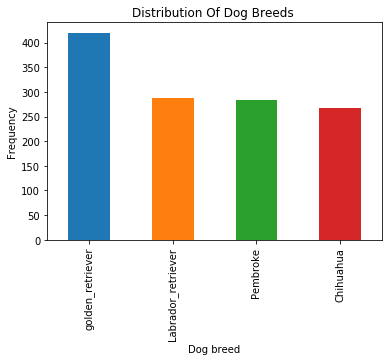

In [505]:
# select the dog breed frequencies
twitter_archive['dog_breed'].value_counts()[1:5].plot('bar')
plt.title("Distribution Of Dog Breeds ")
plt.xlabel('Dog breed')
plt.ylabel('Frequency');
plt.savefig('dog_breed.png')

The figure shows top 5 most predicted dog's breed

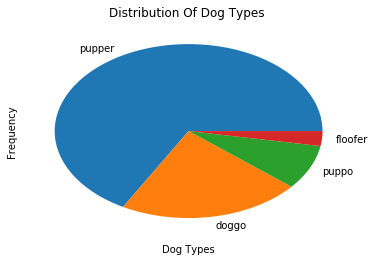

In [506]:
# select the dog types frequencies
twitter_archive['dog_type'].value_counts()[:5].plot('pie')
plt.title("Distribution Of Dog Types ")
plt.xlabel('Dog Types')
plt.ylabel('Frequency');
plt.savefig('dog_freq.png')

The figure shos the distibution of dogs' types

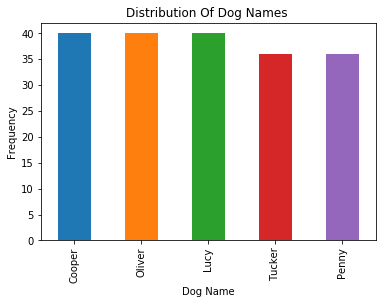

In [507]:
# select the dog names frequencies
twitter_archive['dog_name'].value_counts()[1:6].plot('bar')
plt.title("Distribution Of Dog Names ")
plt.xlabel('Dog Name')
plt.ylabel('Frequency');
plt.savefig('dog_freq.png')

In [508]:
#shows correlation between retweets and other variables 
correlations = twitter_archive.corr()
correlations = correlations['retweets']
print(correlations)

tweet_id                 0.466875
in_reply_to_status_id         NaN
in_reply_to_user_id           NaN
img_num                  0.126660
retweets                 1.000000
favorites                0.921692
rating_ratio            -0.339295
confidence               0.061432
Name: retweets, dtype: float64
